# TASK 1 Predict Restaurant ratings
Shivani Goyal

Cognifyz Technologies

##Importing necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Loading the dataset
rt=pd.read_csv("/content/drive/MyDrive/Dataset .csv")

In [ ]:
#For first 5 rows of the dataset
rt.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## EDA

In [ ]:
#Dispalying the basic information about the dataset
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
#Summary Statistics about the dataset
rt.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
# Dataset Duplicate Value Count
rt.duplicated().sum()

0

In [ ]:
#Checking for the missing values
rt.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

## Preprocessing

In [ ]:
#Handlling missing values in 'Cuisines'
rt.fillna('Cuisines', inplace=True)  # For categorical columns

In [ ]:
#Rechecking the sum of Cuisines
rt.Cuisines.isna().sum()

0

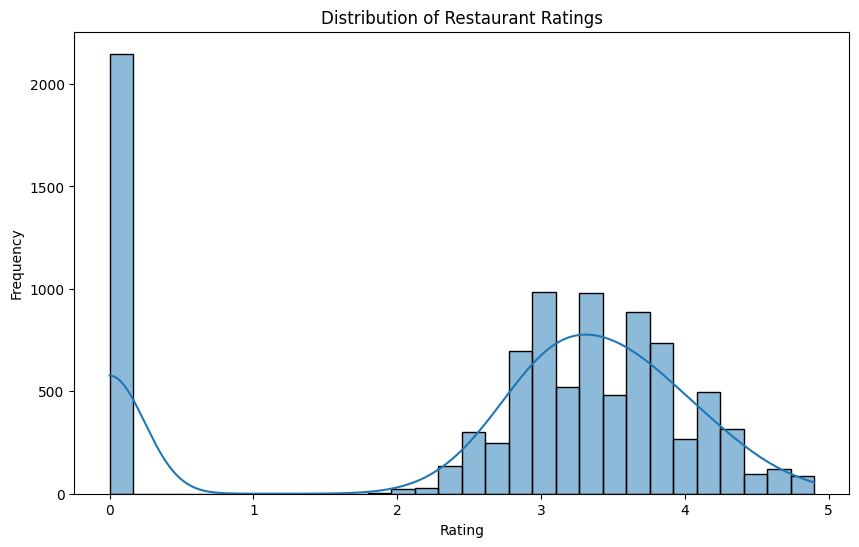

In [ ]:
# Visualize the distribution of the target variable (assume 'rating' as target variable)
plt.figure(figsize=(10, 6))
sns.histplot(rt['Aggregate rating'], bins=30, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

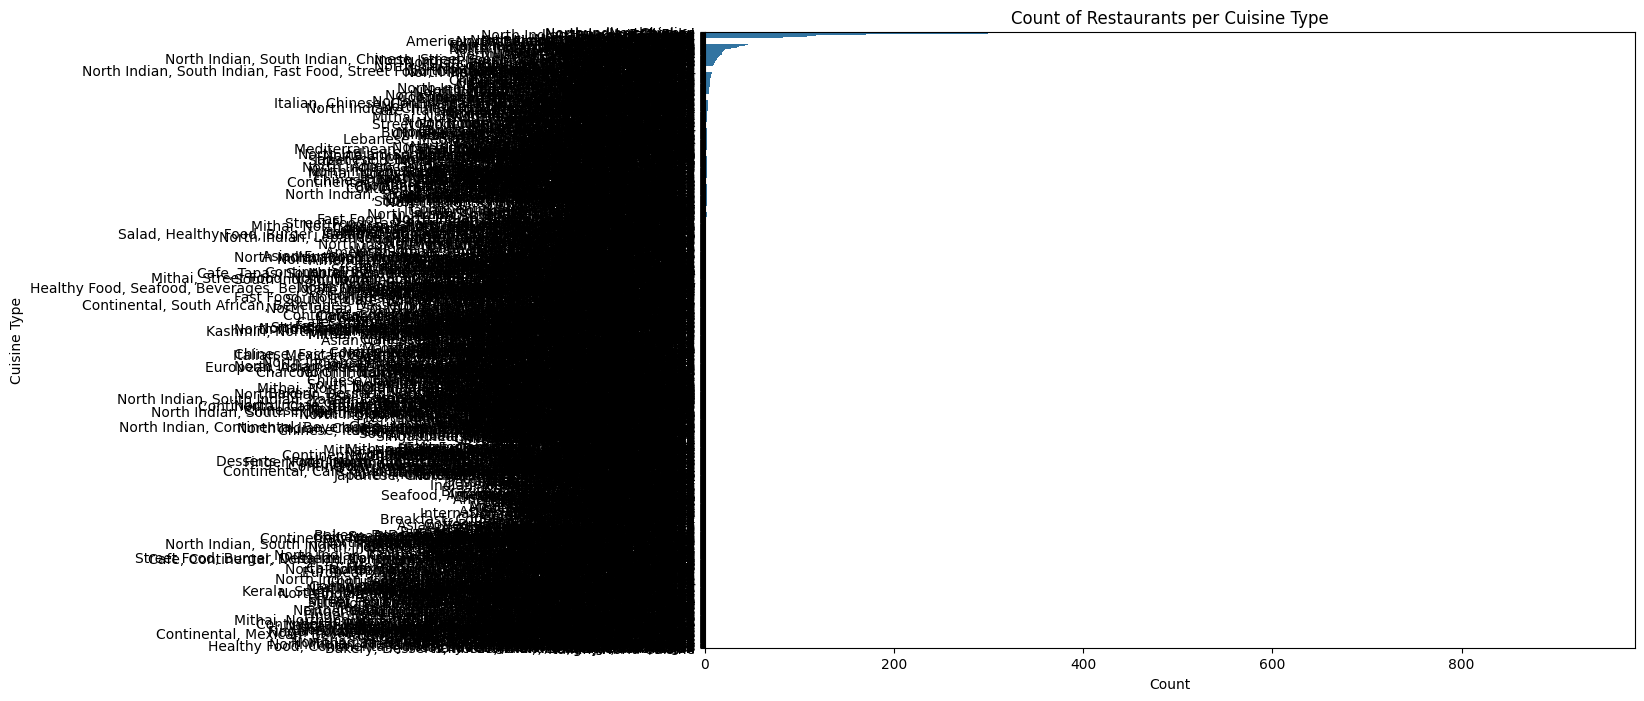

In [ ]:
# Visualize the count of restaurants per cuisine type
plt.figure(figsize=(12, 8))
sns.countplot(y='Cuisines', data=rt, order=rt['Cuisines'].value_counts().index)
plt.title('Count of Restaurants per Cuisine Type')
plt.xlabel('Count')
plt.ylabel('Cuisine Type')
plt.show()

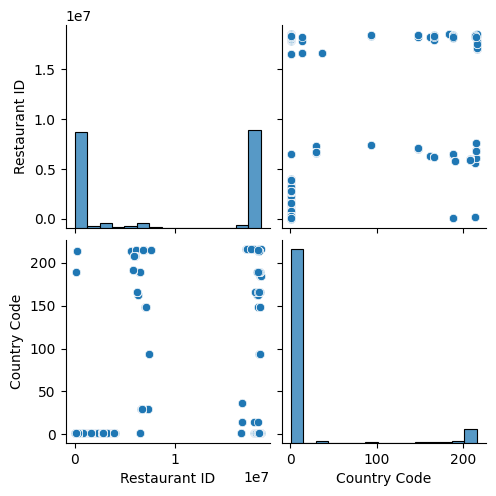

In [ ]:
sns.pairplot(rt[["Restaurant ID", "Country Code"]])
plt.show()

<ipython-input-13-726e0d105d90>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', y='Aggregate rating', data=rt, palette='pastel')


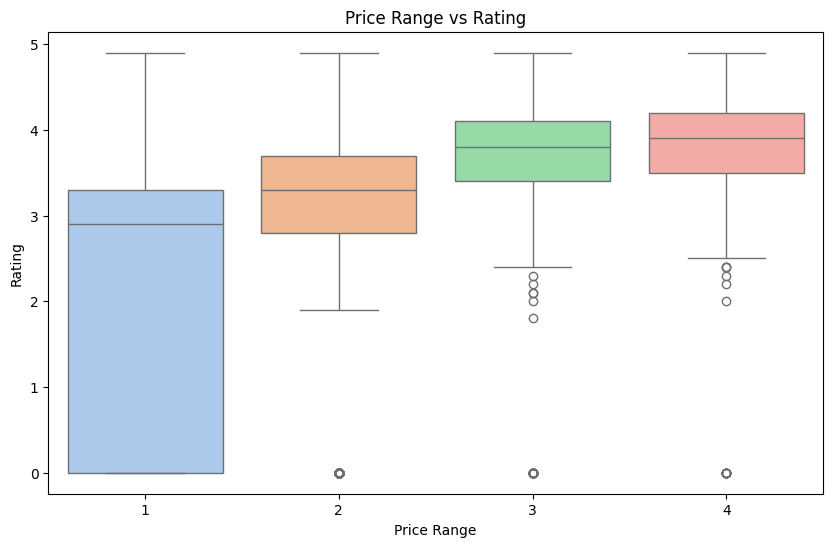

In [ ]:
# Visualize the relationship between a numerical feature and the target variable (example: 'price_range' vs 'rating')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=rt, palette='pastel')
plt.title('Price Range vs Rating')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.show()

##Encode Categorical Variables:

In [ ]:
# Identify categorical columns
Categorical=rt.select_dtypes(include=['object']).columns

In [ ]:
# Apply one-hot encoding to categorical columns
pd.get_dummies(rt,columns=Categorical, drop_first=True)

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Restaurant Name_#Dilliwaala6,Restaurant Name_#InstaFreeze,...,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,6317637,162,121.027535,14.565443,1100,3,4.8,314,False,False,...,False,False,False,False,False,True,False,False,False,False
1,6304287,162,121.014101,14.553708,1200,3,4.5,591,False,False,...,False,False,False,False,False,True,False,False,False,False
2,6300002,162,121.056831,14.581404,4000,4,4.4,270,False,False,...,True,False,False,False,False,False,False,False,False,True
3,6318506,162,121.056475,14.585318,1500,4,4.9,365,False,False,...,False,False,False,False,False,True,False,False,False,False
4,6314302,162,121.057508,14.584450,1500,4,4.8,229,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,28.977392,41.022793,80,3,4.1,788,False,False,...,True,False,False,False,False,False,False,False,False,True
9547,5908749,208,29.041297,41.009847,105,3,4.2,1034,False,False,...,True,False,False,False,False,False,False,False,False,True
9548,5915807,208,29.034640,41.055817,170,4,3.7,661,False,False,...,False,False,False,False,True,False,True,False,False,False
9549,5916112,208,29.036019,41.057979,120,4,4.0,901,False,False,...,True,False,False,False,False,False,False,False,False,True


## Split the Data

In [ ]:
X = rt.drop(columns=['Aggregate rating', 'Restaurant ID', 'Restaurant Name', 'Rating color'])
y = rt['Aggregate rating']

In [ ]:
# Define numeric features and categorical features
num_features = ['Country Code', 'Average Cost for two', 'Price range', 'Votes']
cat_features = ['City', 'Cuisines', 'Currency',
                'Has Table booking', 'Has Online delivery', 'Is delivering now',
                'Switch to order menu', 'Rating text']

# Define preprocessing transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Choose Model

Linear Regression

In [ ]:
model_linear_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
model_linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Country Code',
                                                   'Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['City', 'Cuisines',
                                                   'Currency',
                                                   'Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now',
                                                   'Switch to order menu',
                                                   'Rating text'])])),
                ('regressor', LinearRegression())])

## Model Performance Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict the ratings for the testing set
y_pred = model_linear_regression.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.031102145302236785
Mean Absolute Error: 0.13201074435070748
R-squared: 0.9863353884042223


Random Forest

In [ ]:
model_random_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model using the pipeline
model_random_forest.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Country Code',
                                                   'Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['City', 'Cuisines',
                                                   'Currency',
                                                   'Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now',
                                                   'Switch to order menu',
                                                   'Rating text'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict the ratings for the testing set using the trained Random Forest model
y_pred_random_forest = model_random_forest.predict(X_test)

# Calculate evaluation metrics
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

# Print the evaluation metrics
print("Random Forest Regression Evaluation Metrics:")
print("Mean Squared Error:", mse_random_forest)
print("Mean Absolute Error:", mae_random_forest)
print("R-squared:", r2_random_forest)

Random Forest Regression Evaluation Metrics:
Mean Squared Error: 0.031266691664681115
Mean Absolute Error: 0.11612238273819894
R-squared: 0.9862630955732793


Decision Tree

In [ ]:
# Define the pipeline with preprocessing and Decision Tree regression model
model_decision_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Train the model using the pipeline
model_decision_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Country Code',
                                                   'Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['City', 'Cuisines',
                                                   'Currency',
                                                   'Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now',
                                                   'Switch to order menu',
                                                   'Rating text'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict the ratings for the testing set using the trained Decision Tree model
y_pred_decision_tree = model_decision_tree.predict(X_test)

# Calculate evaluation metrics
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

# Print the evaluation metrics
print("Decision Tree Regression Evaluation Metrics:")
print("Mean Squared Error:", mse_decision_tree)
print("Mean Absolute Error:", mae_decision_tree)
print("R-squared:", r2_decision_tree)


Decision Tree Regression Evaluation Metrics:
Mean Squared Error: 0.05505657596371881
Mean Absolute Error: 0.14647653933368218
R-squared: 0.9758110985905676


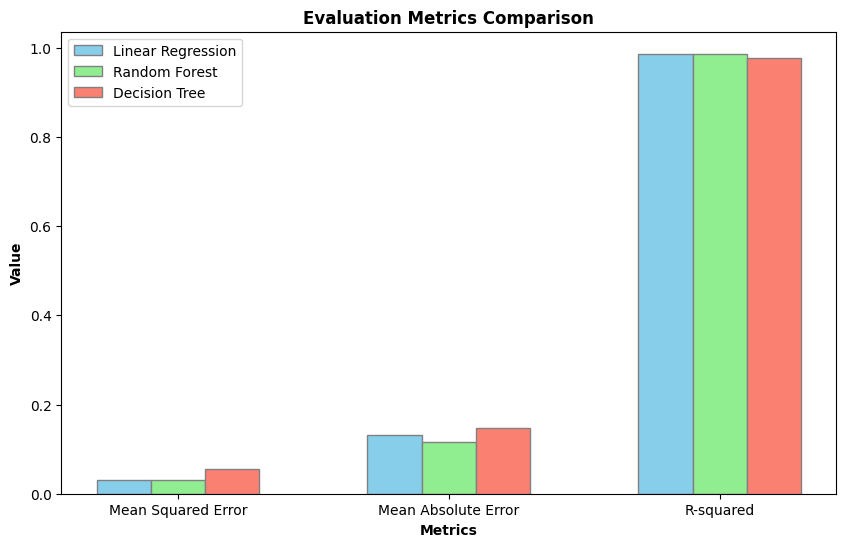

In [ ]:
# Evaluation metrics for Linear Regression
linear_regression_metrics = [mse, mae, r2]

# Evaluation metrics for Random Forest Regression
random_forest_metrics = [mse_random_forest, mae_random_forest, r2_random_forest]

# Evaluation metrics for Decision Tree Regression
decision_tree_metrics = [mse_decision_tree, mae_decision_tree, r2_decision_tree]

# Metric names
metrics_names = ['Mean Squared Error', 'Mean Absolute Error', 'R-squared']

# Model names
model_names = ['Linear Regression', 'Random Forest', 'Decision Tree']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Set positions of bar on X axis
r1 = range(len(metrics_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bars
plt.bar(r1, linear_regression_metrics, color='skyblue', width=bar_width, edgecolor='grey', label='Linear Regression')
plt.bar(r2, random_forest_metrics, color='lightgreen', width=bar_width, edgecolor='grey', label='Random Forest')
plt.bar(r3, decision_tree_metrics, color='salmon', width=bar_width, edgecolor='grey', label='Decision Tree')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(metrics_names))], metrics_names)

# Add ylabel
plt.ylabel('Value', fontweight='bold')

# Add title
plt.title('Evaluation Metrics Comparison', fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.show()


Therefore, Based on the evaluation metrics, the Random Forest Regression model seems to be the most suitable for predicting restaurant ratings in this dataset.